# Stock Prediction of APPL Inc. From Yahoo Finace

Author: Nanjie Yao

Course Project, UC Irvine, Math 10, F23

## Introduction

The goal of this project is to analyze stock price of Apple Inc. by using data from 2000.1 to 2023.12. The project also aims to create a machine learning model to predict the stock price in the future. This analysis will incorporate data manipulation using the Pandas library, plotting graphs using Altair and some machine learning algorithms.


## Import Packages and Dependencies


In [ ]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Import datasets

In [ ]:
df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400


Based on the above output, we see that the DataFrame contains the following information:
* Date: The transaction date.
* Open: The opening stock price for the trading day.
* Low: The lowest price reached during the trading day.
* High: The highest price reached during the trading day.
* Close: The closing stock price for the trading day.
* Adj Close: The adjusted closing price, which takes into account stock dividends and other factors.
* Volume: The number of shares traded and the total value of transactions during the trading day.

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6.018000e+03
mean,35.336180,35.724694,34.963759,35.360399,34.048944,4.007380e+08
std,50.297349,50.865603,49.774069,50.345960,50.129435,3.856775e+08
min,0.231964,0.235536,0.227143,0.234286,0.198600,2.404830e+07
25%,2.151875,2.186339,2.113393,2.147232,1.820166,1.299192e+08
50%,14.376964,14.545179,14.230714,14.397143,12.253059,2.823940e+08
75%,40.654374,40.985626,40.052499,40.653127,38.460524,5.348763e+08
max,196.240005,198.229996,195.279999,196.449997,195.926956,7.421641e+09


In [ ]:
alt.data_transformers.enable('default', max_rows=None)
alt.Chart(df).mark_line().encode(
    x = 'year(Date):T',
    y = 'max(Adj Close)'
).properties(
    title = 'Adj Close Run Chart'
)

alt.Chart(...)

## Feature Engineering and Data Mining 

To obtain more features for training the machine learning models, we have utilized pandas methods to extract additional information such as 'year', 'month', and 'weekday' from the 'Date' column. These features are considered significant factors that can influence the closing price and adjusted price of the stock. By incorporating these extracted features, we aim to provide the models with a more comprehensive representation of the data and potentially improve their predictive performance.

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['weekday']=df['Date'].dt.day_of_week
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
year                  int64
month                 int64
weekday               int64
dtype: object

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['sc_Volume'] = scaler.fit_transform(df[['Volume']])

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,weekday,sc_Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.847207,535796800,2000,1,0,0.350215
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.775779,512377600,2000,1,1,0.289488
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.787131,778321600,2000,1,2,0.979095
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.719014,767972800,2000,1,3,0.952260
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.753073,460734400,2000,1,4,0.155574


* To explore the relationships between different variables, you can utilize the sns.heatmap() function from the Seaborn library to visualize the correlation matrix.

<AxesSubplot: >

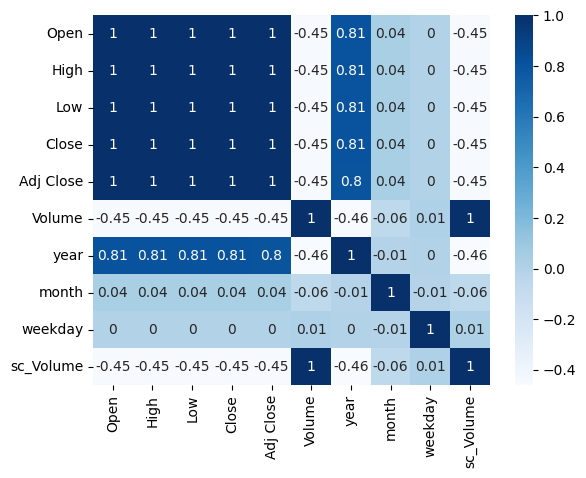

In [ ]:
sns.heatmap(round(df.corr(),2),cmap='Blues',annot=True)

## Machine Learning Algorithm Implementation
* Using linearRegress to predict the future Adj Close with historical data from 2000.1 to 2019.2 (80% Train vs 20% Test).

In [ ]:
from sklearn.linear_model import LinearRegression

x_column =['year','month','weekday','Open','High','Low','sc_Volume']
X_train_reg = df[0:int(df.shape[0]*0.8)][x_column]
y_train_reg = df[0:int(df.shape[0]*0.8)]['Adj Close']
X_test_reg = df[int(df.shape[0]*0.8):-1][x_column]
y_test_reg = df[int(df.shape[0]*0.8):-1]['Adj Close']

model = LinearRegression().fit(X_train_reg,y_train_reg)
y_test_reg = pd.DataFrame(y_test_reg)
y_test_reg['Date']=df[int(df.shape[0]*0.8):-1]['Date']
y_test_reg['pred']=model.predict(X_test_reg)
y_test_reg.head()

,Adj Close,Date,pred
4814,41.682625,2019-02-22,40.184619
4815,41.986256,2019-02-25,40.878763
4816,42.010361,2019-02-26,40.674696
4817,42.140495,2019-02-27,40.612458
4818,41.726013,2019-02-28,40.437820


In [ ]:
c1 = alt.Chart(y_test_reg).mark_line().encode(
    x = 'yearmonthdate(Date):T',
    y = 'Adj Close:Q'
)
c2 = alt.Chart(y_test_reg).mark_line(color = 'red').encode(
    x = 'yearmonthdate(Date):T',
    y = 'pred:Q',
    tooltip = ['pred','Adj Close'] 
).properties(
    title = 'Prediction vs Adj Close(Linear Regression)'
)
ca = c1 + c2

In [ ]:
y_test_sub = y_test_reg[-20:-1]
c1 = alt.Chart(y_test_sub).mark_line().encode(
    x = 'yearmonthdate(Date):T',
    y = alt.Y('Adj Close:Q',scale=alt.Scale(zero=False))
)
c2 = alt.Chart(y_test_sub).mark_line(color = 'red').encode(
    x = 'yearmonthdate(Date):T',
    y = alt.Y('pred:Q',scale=alt.Scale(zero=False)),
    tooltip = ['pred','Adj Close']
).properties(
    title = '(Zoom in)'
)
cb = c1 + c2

In [ ]:
alt.concat(ca,cb)

alt.ConcatChart(...)

* Using RendomForest to predect the future Adj Close with the whole dataset splited by train_test_split class tool from sklearn.model_selection.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[x_column],df['Adj Close'],test_size = 0.2,random_state=42)

* To find the best hyperparameters for 'n_estimators' and 'max_leaf_node' that result in the highest model score and accuracy, we can utilize a for loop to iterate through different combinations of these hyperparameters.

In [ ]:
result = pd.DataFrame(columns = ['Iter','train_er','test_er'])

for i in range(2,50):
    regressor = RandomForestRegressor(n_estimators = i,random_state=42,oob_score=True)
    regressor.fit(X_train,y_train)
    result.loc[len(result.index)] = [i,1-regressor.score(X_train,y_train),1-regressor.score(X_test,y_test)]

result

,Iter,train_er,test_er
0,2.0,0.000047,0.000211
1,3.0,0.000040,0.000197
2,4.0,0.000035,0.000189
3,5.0,0.000033,0.000176
4,6.0,0.000029,0.000171
5,7.0,0.000027,0.000170
6,8.0,0.000026,0.000171
7,9.0,0.000026,0.000170
8,10.0,0.000025,0.000167
9,11.0,0.000023,0.000170


In [ ]:
c3 = alt.Chart(result).mark_line().encode(
    x = 'Iter',
    y = 'train_er'
)
c4 = alt.Chart(result).mark_line(color = 'red').encode(
    x = 'Iter',
    y = 'test_er',
    tooltip = ['Iter','test_er']
).properties(
    title='The test_error vs n_estmators'
)
c3+c4

alt.LayerChart(...)

In [ ]:
result = pd.DataFrame(columns = ['Iter','train_er','test_er'])
for i in range(5,50):
    regressor = RandomForestRegressor(n_estimators = 28, max_leaf_nodes=i,random_state=42,oob_score=True)
    regressor.fit(X_train,y_train)
    result.loc[len(result.index)] = [i,1-regressor.score(X_train,y_train),1-regressor.score(X_test,y_test)]

In [ ]:
c3 = alt.Chart(result).mark_line().encode(
    x = 'Iter',
    y = 'train_er'
)
c4 = alt.Chart(result).mark_line(color = 'red').encode(
    x = 'Iter',
    y = 'test_er',
    tooltip = ['Iter','test_er']
).properties(
    title='The test_error vs max_leaf_node'
)
c3+c4

alt.LayerChart(...)

Based on the above chart, the optimal hyperparameters for the model are determined as follows: 
* Best value for the 'n_estimators' hyperparameter is $28$
* Best value for the 'max_leaf_node' hyperparameter is $45$. 

In [ ]:
pred = pd.DataFrame()
regressor = RandomForestRegressor(n_estimators=28,max_leaf_nodes=45,random_state=42,oob_score=True)
regressor.fit(X_train,y_train)

RandomForestRegressor(max_leaf_nodes=45, n_estimators=28, oob_score=True,
                      random_state=42)

In [ ]:
y_test = pd.DataFrame(y_test)
y_test['index'] = y_test.index
y_test['pred'] = regressor.predict(X_test)

y_test.head()

,Adj Close,index,pred
1315,1.295739,1315,0.514929
5824,147.322388,5824,146.902770
1744,2.672008,1744,2.331832
1860,3.595677,1860,3.981970
1559,1.957536,1559,2.331832


In [ ]:

c5 = alt.Chart(y_test).mark_line().encode(
    x = 'index',
    y = 'Adj Close'
)
c6 = alt.Chart(y_test).mark_line(color = 'red').encode(
    x = 'index',
    y = 'pred',
    tooltip = ['pred','Adj Close']
).properties(
    title = 'Prediction vs Adj Close (Random Forest)'
)
ca = c5+c6

In [ ]:
y_test_sub = y_test.loc[[6005,6007,6010,6012,6014,6016]]
c5 = alt.Chart(y_test_sub).mark_line().encode(
    x = 'index',
    y = alt.Y('Adj Close',scale = alt.Scale(zero=False))
)
c6 = alt.Chart(y_test_sub).mark_line(color = 'red').encode(
    x = 'index',
    y = alt.Y('pred',scale = alt.Scale(zero=False)),
    tooltip = ['pred','Adj Close']
).properties(
    title = '(Zoom in)'
)
cb = c5+c6

In [ ]:
alt.concat(ca,cb)

alt.ConcatChart(...)

* Utilize the XGboost algorithm to predict the stock price.

In [ ]:
!pip install xgboost==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from xgboost import XGBRegressor

In [ ]:
X_train_xg,X_test_xg,y_train_xg,y_test_xg=train_test_split(df[x_column],df['Adj Close'],test_size = 0.2,random_state=42)
result = pd.DataFrame(columns = ['Iter','train_er','test_er'])
for i in np.arange(0.02, 1, 0.01):
    model_xg = XGBRegressor(seed=10,
                      n_estimators=180,
                      max_depth=8,
                      learning_rate = i,
                      min_child_weight = 0.1,
                      random_state = 42
                    )
    model_xg.fit(X_train_xg,y_train_xg)
    result.loc[len(result.index)] = [i,1-model_xg.score(X_train_xg,y_train_xg),1-model_xg.score(X_test_xg,y_test_xg)]
result.head(5)

,Iter,train_er,test_er
0,0.02,0.000873,0.001086
1,0.03,0.000087,0.000230
2,0.04,0.000047,0.000194
3,0.05,0.000033,0.000181
4,0.06,0.000027,0.000186


* To explore the best learning rate, just like before, we use for loop to select the best learning rate to training the machine learning model.

In [ ]:
c7 = alt.Chart(result).mark_line().encode(
    x = 'Iter',
    y = 'train_er'
)
c8 = alt.Chart(result).mark_line(color = 'red').encode(
    x = 'Iter',
    y = 'test_er',
    tooltip = ['Iter','test_er']
).properties(
    title='The test_error vs learning rate'
)
c7+c8

alt.LayerChart(...)

In [ ]:
model_xg = XGBRegressor(seed=10,
                      n_estimators=500,
                      max_depth=8,
                      learning_rate=0.16,
                      min_child_weight=0.5,
                      random_state = 42
                    )
model_xg.fit(X_train_xg,y_train_xg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.16, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=0.5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_test_xg = pd.DataFrame(y_test_xg)
y_test_xg['index'] = y_test_xg.index
y_test_xg['pred'] = model.predict(X_test_xg)
y_test_xg.head()

,Adj Close,index,pred
1315,1.295739,1315,0.997725
5824,147.322388,5824,144.371720
1744,2.672008,1744,2.406504
1860,3.595677,1860,3.409134
1559,1.957536,1559,1.673175


In [ ]:
c9 = alt.Chart(y_test_xg).mark_line().encode(
    x = 'index',
    y = 'Adj Close'
)
c10 = alt.Chart(y_test_xg).mark_line(color = 'red').encode(
    x = 'index',
    y = 'pred',
    tooltip = ['pred','Adj Close']
).properties(
    title = 'Prediction vs Adj Close (XGBoost)'
)
ca = c9+c10

In [ ]:
y_test_sub = y_test_xg.loc[[6005,6007,6010,6012,6014,6016]]
c9 = alt.Chart(y_test_sub).mark_line().encode(
    x = 'index',
    y = alt.Y('Adj Close',scale=alt.Scale(zero=False))
)
c10 = alt.Chart(y_test_sub).mark_line(color = 'red').encode(
    x = 'index',
    y = alt.Y('pred',scale=alt.Scale(zero=False)),
    tooltip = ['pred','Adj Close']
).properties(
    title = '(Zoom in)'
)
cb = c9+c10

In [ ]:
alt.concat(ca,cb)

alt.ConcatChart(...)

## Model Accuracy Evaluation

To assess the accuracy of the regression model, various evaluation metrics including 'Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', and 'Coefficient of Determination (r2_score)' are employed. These metrics are used to quantify different aspects of the model's performance:
* 'Score': This metric represents the coefficient of determination, which indicates the proportion of the variance in the target variable that can be explained by the model. A score closer to 1 indicates a better fit.
* 'Mean Squared Error (MSE)': It calculates the average squared difference between the predicted and actual values. A lower MSE indicates better performance, with the ideal value being 0.
* 'Mean Absolute Error (MAE)': It measures the average absolute difference between the predicted and actual values. Similar to MSE, a lower MAE indicates better accuracy.
* 'Coefficient of Determination (r2_score)': This metric quantifies the proportion of the variance in the dependent variable that can be predicted from the independent variables. A higher r2_score signifies a better fit, with a maximum value of 1.
By considering these evaluation metrics, we can assess the regression model's performance and determine its accuracy in predicting the target variable.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### Linear Regression

In [ ]:
print("Model score is :",model.score(X_test_reg,y_test_reg['Adj Close']))
print("The MSE is:",mean_squared_error(y_test_reg['Adj Close'],y_test_reg['pred']))
print("The MAE is:",mean_absolute_error(y_test_reg['Adj Close'],y_test_reg['pred']))
print("The R^2-Score is:",r2_score(y_test_reg['Adj Close'],y_test_reg['pred']))

Model score is : 0.9962034147844374
The MSE is: 7.595691485871398
The MAE is: 2.449996289819682
The R^2-Score is: 0.9962034147844374


### Random Forest

In [ ]:
print("Model score is :",model.score(X_test,y_test['Adj Close']))
print("The MSE is:",mean_squared_error(y_test['Adj Close'],y_test['pred']))
print("The MAE is:",mean_absolute_error(y_test['Adj Close'],y_test['pred']))
print("The R^2-Score is:",r2_score(y_test['Adj Close'],y_test['pred']))

Model score is : 0.9992838504395637
The MSE is: 0.6243304517044721
The MAE is: 0.5157837558200419
The R^2-Score is: 0.9997613586729908


### XGboost

In [ ]:
print("Model score is :",model_xg.score(X_test_xg,y_test_xg['Adj Close']))
print("The MSE is:",mean_squared_error(y_test_xg['Adj Close'],y_test_xg['pred']))
print("The MAE is:",mean_absolute_error(y_test_xg['Adj Close'],y_test_xg['pred']))
print("The R^2-Score is:",r2_score(y_test_xg['Adj Close'],y_test_xg['pred']))

Model score is : 0.9997901476874566
The MSE is: 1.8735815131375915
The MAE is: 0.8262382258930997
The R^2-Score is: 0.9992838504395637


* Based on the output above, all the machine learning model achieves high scores and low MSE & MAE. It proves that it's possible to use the machine learning algorithms in the quantum transaction domain.

## Summary
In this project, we have implemented the Linear Regression, Random Forest and XGBoost algorithms to predict the stock price of APPL Inc. All the algorithms have achieved high scores and accuracy on the testing data. These results indicate the potential of using machine learning in quantitative trading and the stock market domain. 

## References


* What is the source of your dataset(s)?
DataSet Link:https://finance.yahoo.com/quote/AAPL/history?p=AAPL

* List any other references that you found helpful.
MAE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
R2_score: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
Seaborn heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
Data mining: https://en.wikipedia.org/wiki/Data_mining
StanderScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
XGBoost: https://xgboost.readthedocs.io/en/stable/